In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [4]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [6]:
train = df.iloc[:156]
test = df.iloc[156:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [11]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Epoch 1/50
144/144 [==============================] - 14s 3ms/step - loss: 0.0572
Epoch 2/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0199
Epoch 3/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 4/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 5/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 6/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 7/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 8/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 9/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 10/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 11/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 12/50
144/144 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/50
144/144 [===

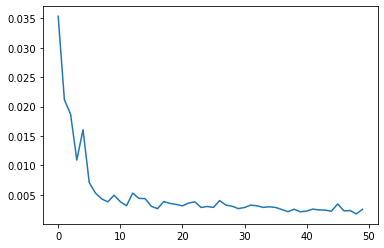

In [12]:
model.fit(generator,epochs=50)
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
last_train_batch = scaled_train[-12:]

In [19]:
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [20]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [21]:
model.predict(last_train_batch)

array([[0.67944705]], dtype=float32)

In [40]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [47]:
for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [33]:
true_predictions = scaler.inverse_transform(test_predictions)

In [34]:
test['Predictions'] = true_predictions

ValueError: Length of values (24) does not match length of index (12)

<AxesSubplot:xlabel='Date'>

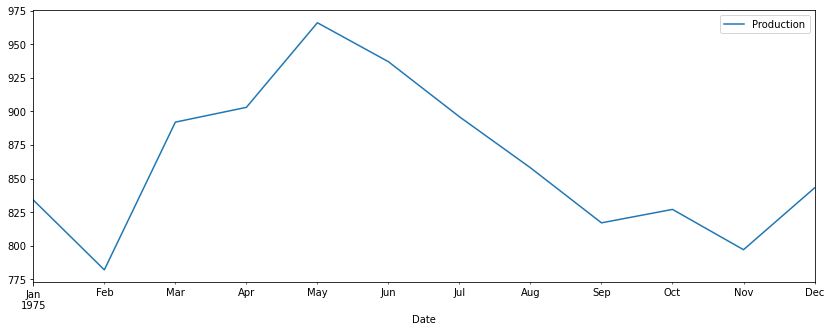

In [35]:
test.plot(figsize=(14,5))

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

KeyError: 'Predictions'